In [1]:
rm(list=ls())
library(ggplot2)
data=read.table("gecco.snps.svm.scores.txt",header=TRUE,sep='\t',row.names=1)


In [2]:
head(data)

,colo205.REF,colo205.ALT,colo205.ALT.REF,hct116.REF,hct116.ALT,hct116.ALT.REF,sw480.REF,sw480.ALT,sw480.ALT.REF,dnase_c.REF,dnase_c.ALT,dnase_c.ALT.REF,dnase_v.REF,dnase_v.ALT,dnase_v.ALT.REF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1:713977_C/T,-0.048,-0.122,-0.075,0.309,0.141,-0.168,0.159,0.266,0.107,-0.256,-0.140,0.116,0.247,0.233,-0.014
1:714277_C/A,1.490,1.453,-0.037,2.396,1.822,-0.574,2.467,1.988,-0.480,2.760,2.523,-0.237,3.064,2.839,-0.226
1:714439_G/A,-0.839,-0.396,0.443,0.056,0.099,0.043,0.539,0.377,-0.162,0.092,0.026,-0.066,1.131,1.050,-0.081
1:714596_T/C,-0.971,-0.945,0.026,-0.568,-0.445,0.123,-0.593,-0.321,0.272,-0.900,-0.798,0.102,-0.277,-0.226,0.051
1:715205_C/G,-0.478,-0.889,-0.411,-0.195,-0.373,-0.178,-0.465,-0.520,-0.055,-0.650,-0.884,-0.234,-0.641,-0.948,-0.307
1:715265_C/T,0.033,0.183,0.150,0.446,0.430,-0.016,0.454,0.264,-0.190,-0.029,-0.108,-0.078,-0.051,-0.050,0.001


In [4]:
cols=c("REF"="#0000FF","ALT"="#FF0000")
data=as.data.frame(scale(data))


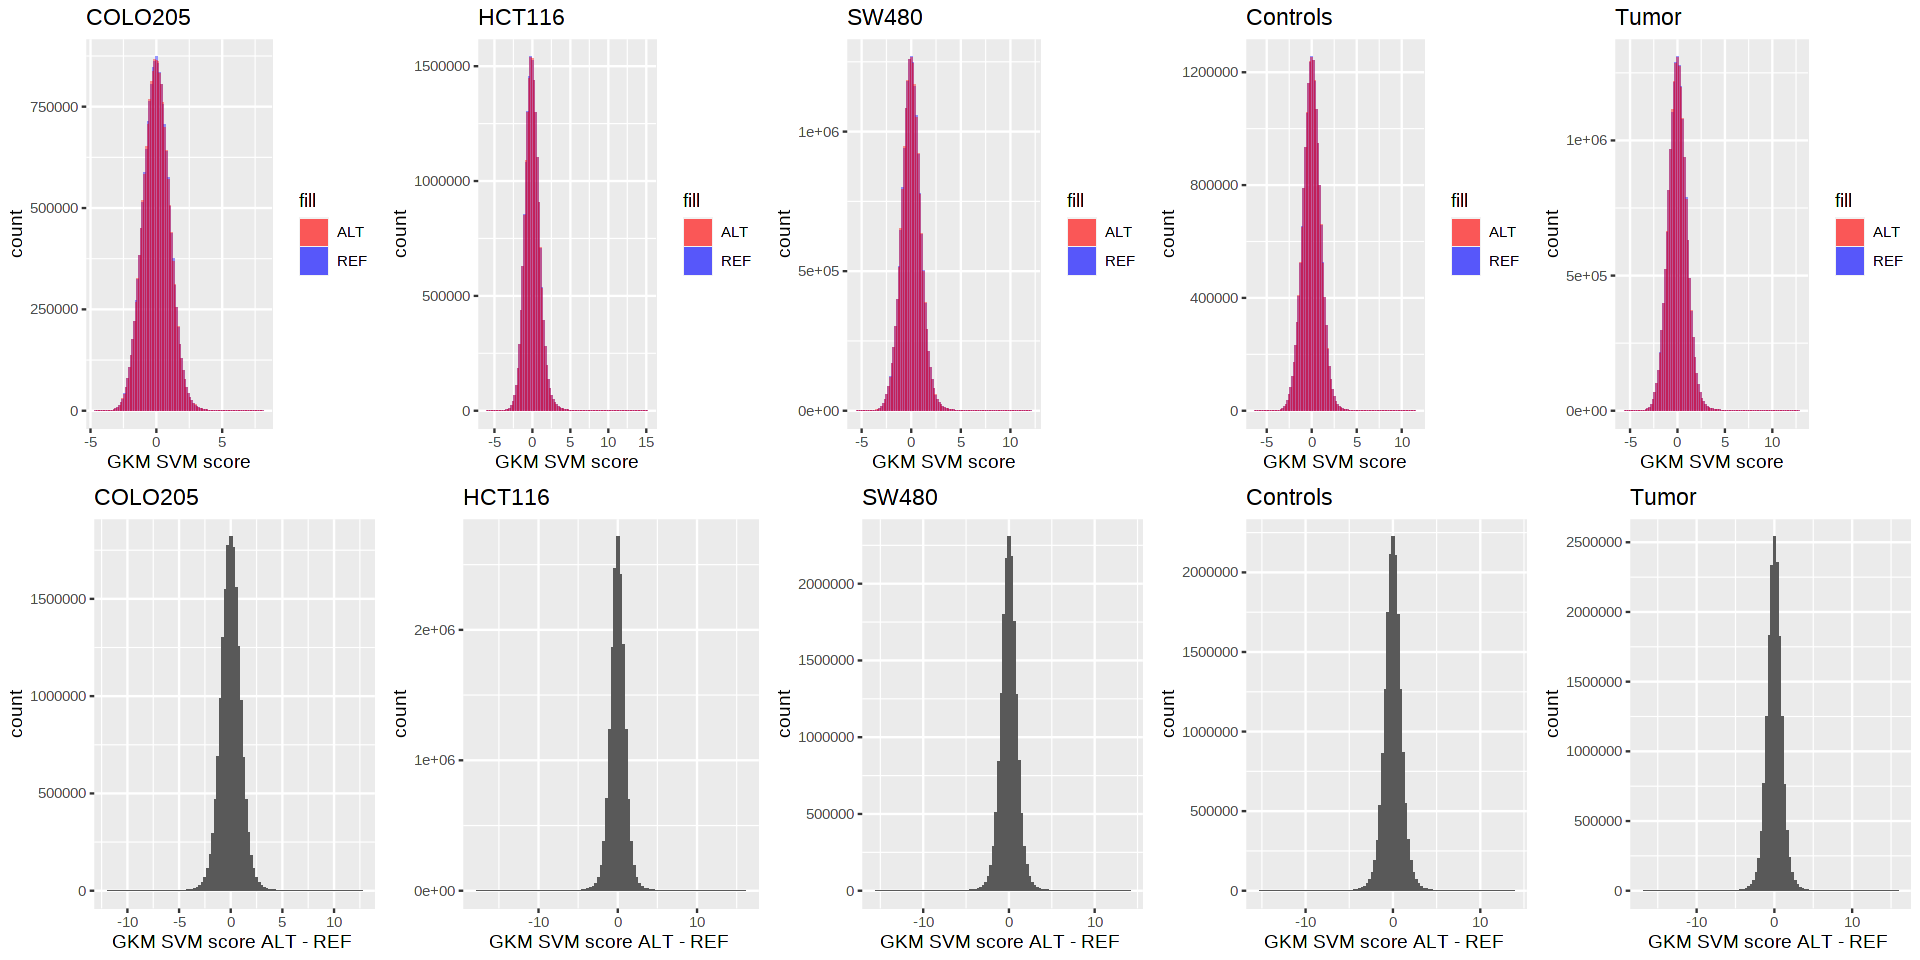

In [5]:
options(repr.plot.width = 16, repr.plot.height = 8)


p1=ggplot(data=data)+
  geom_histogram(aes(x=colo205.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=colo205.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("COLO205")+
  scale_fill_manual(values=cols)

p2=ggplot(data=data)+
  geom_histogram(aes(x=colo205.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("COLO205")


p3=ggplot(data=data)+
  geom_histogram(aes(x=hct116.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=hct116.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("HCT116")+
  scale_fill_manual(values=cols)

p4=ggplot(data=data)+
  geom_histogram(aes(x=hct116.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("HCT116")


p5=ggplot(data=data)+
  geom_histogram(aes(x=sw480.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=sw480.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("SW480")+
  scale_fill_manual(values=cols)

p6=ggplot(data=data)+
  geom_histogram(aes(x=sw480.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("SW480")


p7=ggplot(data=data)+
  geom_histogram(aes(x=dnase_c.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=dnase_c.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("Controls")+
  scale_fill_manual(values=cols)

p8=ggplot(data=data)+
  geom_histogram(aes(x=dnase_c.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("Controls")

p9=ggplot(data=data)+
  geom_histogram(aes(x=dnase_v.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=dnase_v.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("Tumor")+
  scale_fill_manual(values=cols)

p10=ggplot(data=data)+
  geom_histogram(aes(x=dnase_v.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("Tumor")

source("~/helpers.R")
multiplot(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,cols=5)


In [6]:
means=colMeans(data)
std=apply(as.matrix(data),2,sd)
summary=rbind(means,std)
write.table(summary,file="mean_and_std.tsv",quote=FALSE,sep='\t',row.names=TRUE,col.names=TRUE)
cols=c("REF"="#0000FF","ALT"="#FF0000")
data=as.data.frame(scale(data))
write.table(round(data,3),file="gecco.snps.not.in.peaks.svm.scores.scaled.txt",quote=FALSE,row.names=TRUE,col.names=TRUE,sep='\t')


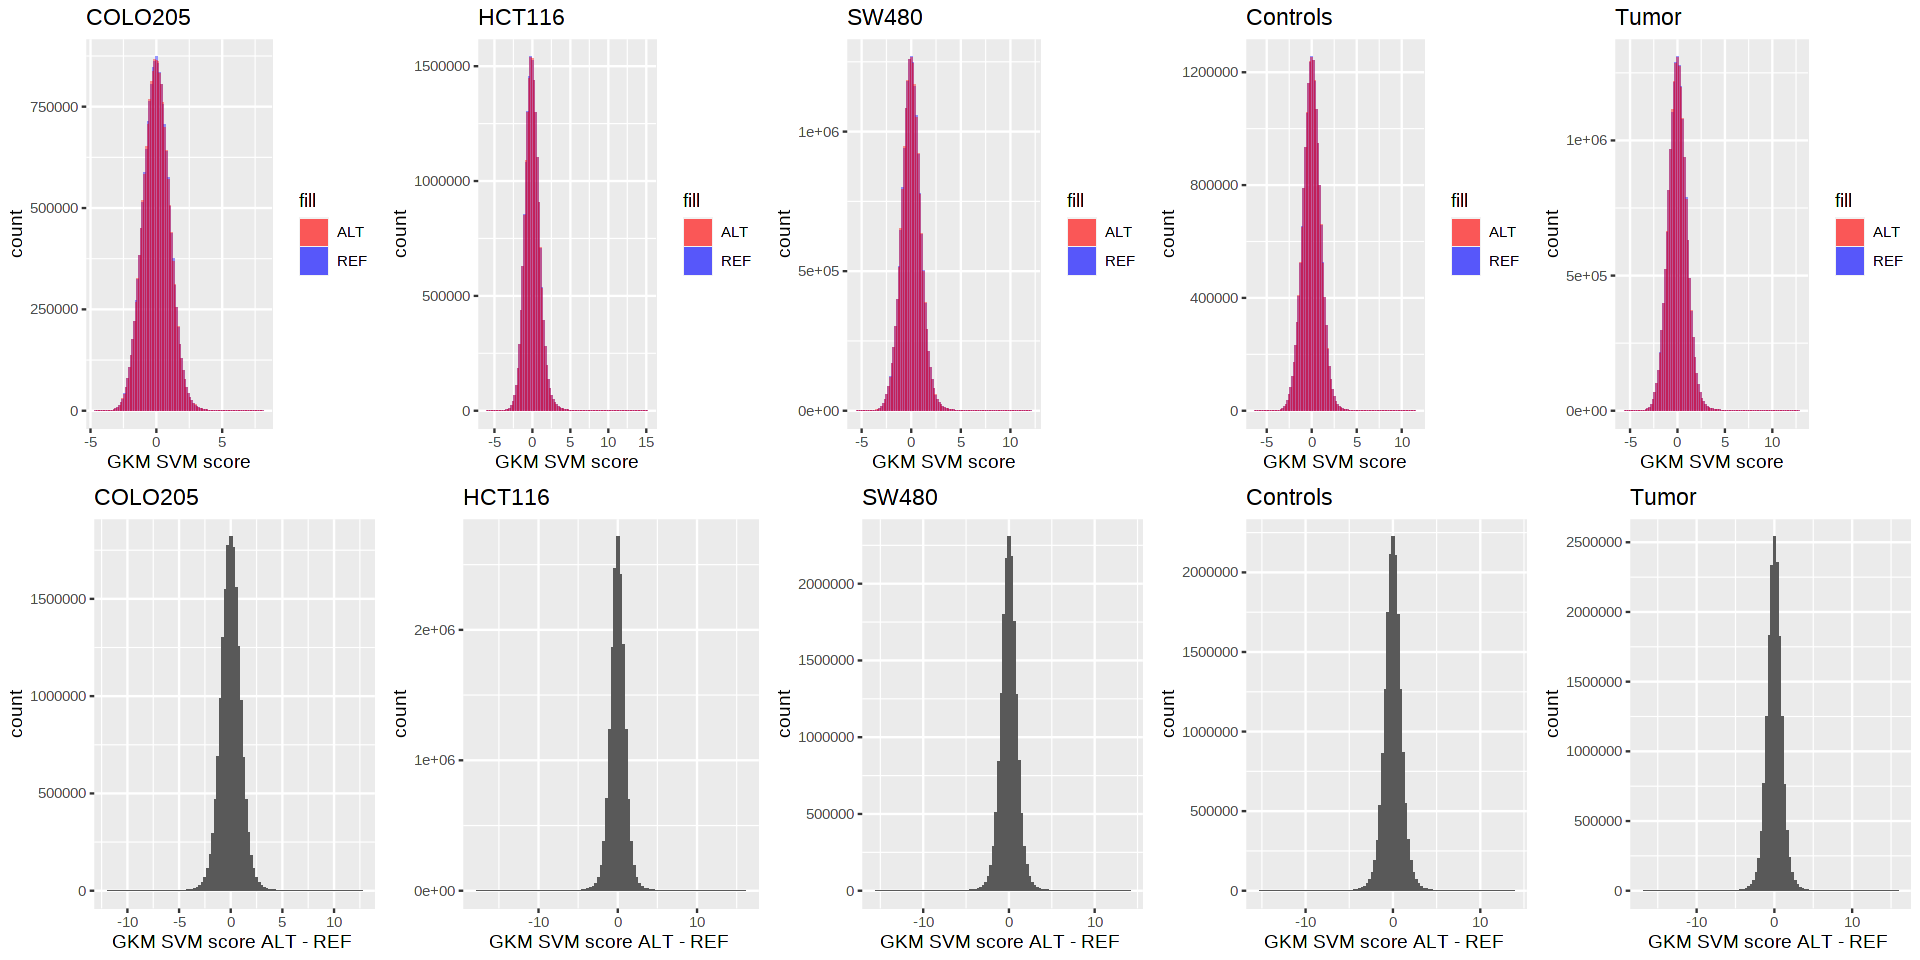

In [7]:
options(repr.plot.width = 16, repr.plot.height = 8)

p1=ggplot(data=data)+
  geom_histogram(aes(x=colo205.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=colo205.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("COLO205")+
  scale_fill_manual(values=cols)

p2=ggplot(data=data)+
  geom_histogram(aes(x=colo205.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("COLO205")


p3=ggplot(data=data)+
  geom_histogram(aes(x=hct116.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=hct116.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("HCT116")+
  scale_fill_manual(values=cols)

p4=ggplot(data=data)+
  geom_histogram(aes(x=hct116.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("HCT116")


p5=ggplot(data=data)+
  geom_histogram(aes(x=sw480.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=sw480.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("SW480")+
  scale_fill_manual(values=cols)

p6=ggplot(data=data)+
  geom_histogram(aes(x=sw480.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("SW480")


p7=ggplot(data=data)+
  geom_histogram(aes(x=dnase_c.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=dnase_c.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("Controls")+
  scale_fill_manual(values=cols)

p8=ggplot(data=data)+
  geom_histogram(aes(x=dnase_c.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("Controls")

p9=ggplot(data=data)+
  geom_histogram(aes(x=dnase_v.REF,fill='REF'),alpha=0.4,bins=100)+
  geom_histogram(aes(x=dnase_v.ALT,fill='ALT'),alpha=0.4,bins=100)+
  xlab("GKM SVM score")+
  ggtitle("Tumor")+
  scale_fill_manual(values=cols)

p10=ggplot(data=data)+
  geom_histogram(aes(x=dnase_v.ALT.REF),bins=100)+
  xlab("GKM SVM score ALT - REF ")+
  ggtitle("Tumor")

source("~/helpers.R")
multiplot(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,cols=5)


In [8]:
#get stats
nrow(data[data$colo205.ALT.REF > 2,])
nrow(data[data$colo205.ALT.REF < -2,])

nrow(data[data$hct116.ALT.REF > 2,])
nrow(data[data$hct116.ALT.REF < -2,])

nrow(data[data$sw480.ALT.REF > 2,])
nrow(data[data$sw480.ALT.REF < -2,])

nrow(data[data$dnase_c.ALT.REF > 2,])
nrow(data[data$dnase_c.ALT.REF < -2,])

nrow(data[data$dnase_v.ALT.REF > 2,])
nrow(data[data$dnase_v.ALT.REF < -2,])





[1] 386734

[1] 374532

[1] 358887

[1] 359477

[1] 388584

[1] 381414

[1] 416003

[1] 420265

[1] 399634

[1] 407010